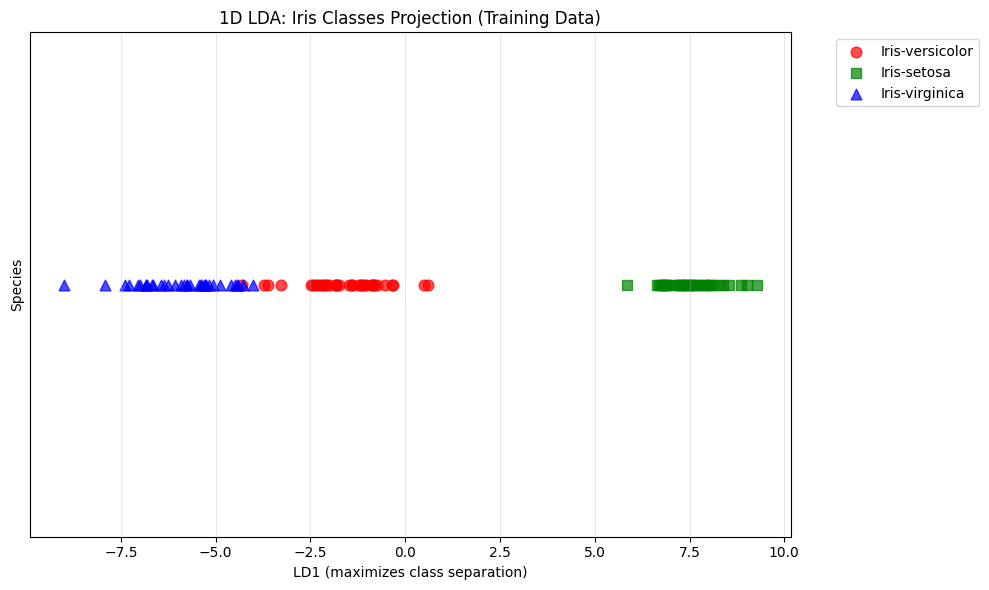

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load Iris dataset from CSV
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

# Features and label
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# LDA for 1D visualization
lda_vis = LinearDiscriminantAnalysis(n_components=1)
X_lda_train = lda_vis.fit_transform(X_train, y_train)

# ---------- 1D GRAPH: Visualize class separation ----------
plt.figure(figsize=(10, 6))

classes = y_train.unique()
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']  # different shapes for better distinction

for cls, color, marker in zip(classes, colors, markers):
    idx = (y_train == cls)
    plt.scatter(
        X_lda_train[idx].flatten(),  # 1D → flatten to 1 column
        np.zeros_like(X_lda_train[idx].flatten()),  # Y=0 for all (vertical line)
        c=color,
        marker=marker,
        label=cls,
        s=60,
        alpha=0.7
    )

plt.xlabel('LD1 (maximizes class separation)')
plt.ylabel('Species')
plt.title('1D LDA: Iris Classes Projection (Training Data)')
plt.yticks([])  # Hide Y-axis ticks (no meaning)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
